In [1]:
import pandas as pd
import math
import matplotlib as mpl
#mpl.use('pdf')
import matplotlib.pyplot as plt
import numpy as np
from collections import OrderedDict
import matplotlib
import seaborn as sns
#Red
red1= sns.color_palette("Reds_d",1)
red2= sns.color_palette("Reds_d",2)
red3= sns.color_palette("Reds_d",3)
red4= sns.color_palette("Reds_d",4)
red5= sns.color_palette("Reds_d",5)
red6= sns.color_palette("Reds_d",6)
red7= sns.color_palette("Reds_d",7)
red8= sns.color_palette("Reds_d",8)

#YellowGreen
yg1= sns.color_palette("YlGn_d",1)
yg2= sns.color_palette("YlGn_d",2)
yg3= sns.color_palette("YlGn_d",3)
yg4= sns.color_palette("YlGn_d",4)
yg5= sns.color_palette("YlGn_d",5)
yg7= sns.color_palette("YlGn_d",7)

#GreenBlue
gb1= sns.color_palette("GnBu_d",1)
gb2= sns.color_palette("GnBu_d",2)
gb3= sns.color_palette("GnBu_d",3)
gb4= sns.color_palette("GnBu_d",4)
gb5= sns.color_palette("GnBu_d",5)
gb6= sns.color_palette("GnBu_d",6)
gb7= sns.color_palette("GnBu_d",7)
gb8= sns.color_palette("GnBu_d",8)

cp2 = list(map(lambda x: sns.desaturate(x,0.9),[red7[2],gb7[4]]))
cp2v1 = list(map(lambda x: sns.desaturate(x,0.9),[red7[2],yg7[0]]))
cp3 = list(map(lambda x: sns.desaturate(x,0.9),[yg7[0],gb7[4],red7[2]]))
#cp4 = list(map(lambda x: sns.desaturate(x,0.9),red1+gb2+yg1))
cp2_2 = list(map(lambda x: sns.desaturate(x,0.9),[red7[0],red7[3],gb7[4],gb7[6]]))
cp_total_spectrum = list(map(lambda x: sns.desaturate(x,0.9),gb7 + yg7 + red7))

In /home/petyros/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/petyros/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/petyros/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/petyros/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/petyros/.local/lib/python3.6/site-packages/matplotlib/mpl-d

In [2]:
sns.set_palette(cp2)
sns.color_palette()

[(0.8807358708189157, 0.32277047289504046, 0.2744659746251443),
 (0.2649160579264386, 0.5270152505446624, 0.6269460463924131)]

In [3]:
sns.set_palette(cp2v1)
sns.color_palette()

[(0.8807358708189157, 0.32277047289504046, 0.2744659746251443),
 (0.6120315263360248, 0.8081330257593234, 0.5357962322183777)]

In [4]:
sns.set_palette(cp3)
sns.color_palette()

[(0.6120315263360248, 0.8081330257593234, 0.5357962322183777),
 (0.2649160579264386, 0.5270152505446624, 0.6269460463924131),
 (0.8807358708189157, 0.32277047289504046, 0.2744659746251443)]

In [5]:
cpbasic = list(map(lambda x: sns.desaturate(x,0.9),['g','r','b','orange','grey']))
sns.set_palette(cpbasic)
sns.color_palette()

[(0.025000000000000022, 0.475, 0.025000000000000022),
 (0.95, 0.050000000000000044, 0.050000000000000044),
 (0.050000000000000044, 0.050000000000000044, 0.95),
 (0.95, 0.6323529411764707, 0.050000000000000044),
 (0.5019607843137255, 0.5019607843137255, 0.5019607843137255)]

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


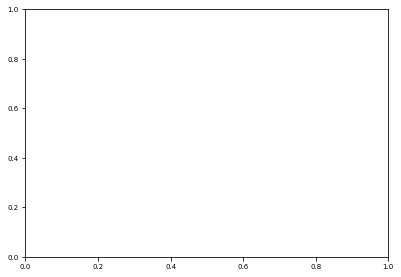

In [6]:
font=8
plt.rc('font', family='serif', serif='Times')
#plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=font-1)
plt.rc('ytick', labelsize=font-1)
plt.rc('axes', labelsize=font)


# width as measured in inkscape
width = 3.487
height = width / 1.618*3/2

fig, axs = plt.subplots()
#fig.subplots_adjust(left=.15, bottom=.16, right=.99, top=.97)
fig.subplots_adjust(left=.15, bottom=.08, right=.99, top=.94)

#import seaborn as sns
#sns.set(style="whitegrid", palette=cpbasic,font_scale=0.2, rc={"lines.linewidth": 1})

In [7]:
reps = 5
implementations = ['cuSPARSE_csr11', 'cuSPARSE_coo11', 'CSR5_9', 'cuSPARSE_csr9-2', 'cuSPARSE_hyb9-2']
#['OMP_csr-40', 'cuSPARSE_csr', 'cuSPARSE_hyb', 'cuSPARSE_bsr-2', 'cuSPARSE_bsr-4', 'cuSPARSE_bsr-16', 'cuSPARSE_bsr-64', 'cuCSR5']
dtypes=['D']
for dtype in dtypes:
    fname = "results_gamma_4-8.csv" #"silver1-TeslaV100_dtype-%s_run_dataset.csv" % dtype
    inputdata = pd.read_csv('../hybrid-spmv-lib/Benchmarks/%s' % fname, names = 
                            ['mtx_name','distribution','placement','diagonal_factor', 'seed','m','n','nz',
                             'density','A_mem_footprint','mem_range','avg_nz_row','std_nz_row','avg_bandwidth',
                            'std_bandwidth','avg_scattering','std_scattering','implementation','time','gflops','W_avg', 'J_estimated'])
    print(inputdata.head(10))
    groupreps = inputdata.groupby(['mtx_name','distribution','placement','diagonal_factor', 'seed','m','n', 
                             'density','A_mem_footprint','mem_range','nz','avg_nz_row','std_nz_row','avg_bandwidth',
                            'std_bandwidth','avg_scattering','std_scattering', 'implementation']).mean().reset_index()
    #print(groupreps.head(2))
    for ran in groupreps['mem_range'].unique():
        groupreps_range = groupreps[groupreps['mem_range'] == ran]
        #groupbench = groupreps_range.groupby(['mtx_name','distribution','placement','diagonal_factor', 'seed','m','n', 'density','A_mem_footprint','mem_range','nz','avg_nz_row','std_nz_row','avg_bandwidth', 'std_bandwidth','avg_scattering','std_scattering'], as_index =False)
    
        sns_plot = sns.boxplot(data=groupreps_range, x="implementation", y="gflops", ax=axs)
        axs.set_title('Dataset Mem Range %s' %(ran))
        fig.savefig('super_easy_pythonia_per_format_dtype-%s.pdf' % (dtype) )
        plt.close()
        fig, axs = plt.subplots() 
        sns_plot = sns.boxplot(data=groupreps_range, x="distribution", y="gflops", ax=axs)
        axs.set_title('Dataset Mem Range %s' %(ran))
        fig.savefig('super_easy_pythonia_per_dist_dtype-%s.pdf' % (dtype) )
        plt.close()
        fig, axs = plt.subplots() 
        sns_plot = sns.scatterplot(data=groupreps_range, x="density", y="gflops", ax=axs)
        axs.set_title('Dataset Mem Range %s' %(ran))
        fig.savefig('super_easy_pythonia_per_density_dtype-%s.pdf' % (dtype) )
        plt.close()
        fig, axs = plt.subplots() 
        sns_plot = sns.scatterplot(data=groupreps_range, x="A_mem_footprint", y="gflops", ax=axs)
        axs.set_title('Dataset Mem Range %s' %(ran))
        fig.savefig('super_easy_pythonia_per_memfoot_dtype-%s.pdf' % (dtype) )
        plt.close()
        fig, axs = plt.subplots() 
        sns_plot = sns.boxplot(data=groupreps_range, x="m", y="gflops", ax=axs)
        axs.set_title('Dataset Mem Range %s' %(ran))
        fig.savefig('super_easy_pythonia_per_m_dtype-%s.pdf' % (dtype) )
        plt.close()
        fig, axs = plt.subplots() 
        sns_plot = sns.boxplot(data=groupreps_range, x="n", y="gflops", ax=axs)
        axs.set_title('Dataset Mem Range %s' %(ran))
        fig.savefig('super_easy_pythonia_per_n_dtype-%s.pdf' % (dtype) )
        plt.close()
        fig, axs = plt.subplots() 
        sns_plot = sns.scatterplot(data=groupreps_range, x="nz", y="gflops", ax=axs)
        axs.set_title('Dataset Mem Range %s' %(ran))
        fig.savefig('super_easy_pythonia_per_nz_dtype-%s.pdf' % (dtype) )
        plt.close()
        fig, axs = plt.subplots() 
        sns_plot = sns.scatterplot(data=groupreps_range, x="avg_nz_row", y="gflops", ax=axs)
        axs.set_title('Dataset Mem Range %s' %(ran))
        fig.savefig('super_easy_pythonia_per_avg_nz_row_dtype-%s.pdf' % (dtype) )
        plt.close()

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


    mtx_name distribution placement  diagonal_factor  seed     m     n  \
0  synthetic        gamma    random            1.000    14  4000  4000   
1  synthetic        gamma  diagonal            0.500    14  4000  4000   
2  synthetic        gamma  diagonal            0.050    14  4000  4000   
3  synthetic        gamma  diagonal            0.005    14  4000  4000   
4  synthetic        gamma    random            1.000    14  4000  4000   
5  synthetic        gamma  diagonal            0.500    14  4000  4000   
6  synthetic        gamma  diagonal            0.050    14  4000  4000   
7  synthetic        gamma  diagonal            0.005    14  4000  4000   
8  synthetic        gamma    random            1.000    14  4000  4000   
9  synthetic        gamma  diagonal            0.500    14  4000  4000   

       nz   density  A_mem_footprint  ... std_nz_row  avg_bandwidth  \
0  417976  2.612350         13.57310  ...   0.524847       0.981664   
1  417976  2.612350          9.70361  ...  

In [8]:
    for desc, experiment in groupbench:
        best_format = experiment['implementation'].iloc[experiment['gflops'].argmax()]
        #print(best_format)
        if frame['time'].count() < reps:
            print(frame.head(1))

NameError: name 'groupbench' is not defined